In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("iris.csv")
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Normally, we could use the column "Species" for a labeled ML approach.
# However, we intentionally ignore this column because we want to see
# how clustering is done.

x = dataset.drop(["Id", "Species"], axis=1)
x = x.values

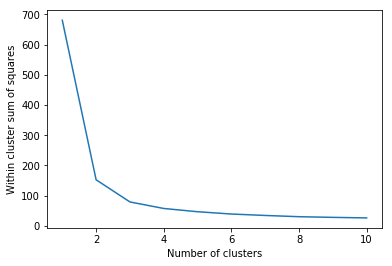

In [5]:
# We will be doing flat clustering.
# We must give the number of clusters.
# Number of clusters is determined by "elbowing"

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squares")
plt.show()

In [6]:
# Graph shows that elbow = 3. That's the optimal cluster count.

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

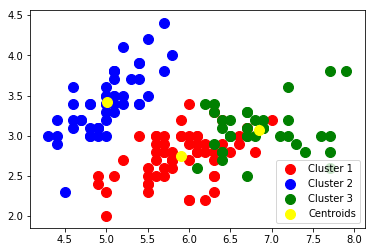

In [8]:
# Paint clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c='green', label='Cluster 3')

# Paint centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')

# Paint legend
plt.legend()